In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# import data
webiste_data = pd.read_csv('../data/Website_review_dataset.csv')

# Analysis Objective
- Likelihood of a pharmacy to track delivery  
Paramaters:  
    - Country
    - Physical address  
    - sec address  
    - an APP  
    - helpline  
    - chat bot (chat 1 and 2)  
    - complaints

In [17]:
# subset data based on above columns for analysis

webiste_data.columns = webiste_data.columns.str.lower()

track_data_df = webiste_data[['country','phy_add','sec_address','e_pharm_app','tele_helpline','chat___1','chat___2','complaints','track_dlvry']]

In [20]:
# take only Kenya and India

track_data = track_data_df[track_data_df['country'].isin(['kenya','india'])].reset_index(drop=True)

track_data['country'] = track_data['country'].map({
    'kenya':0,
    'india':1
})

<Axes: >

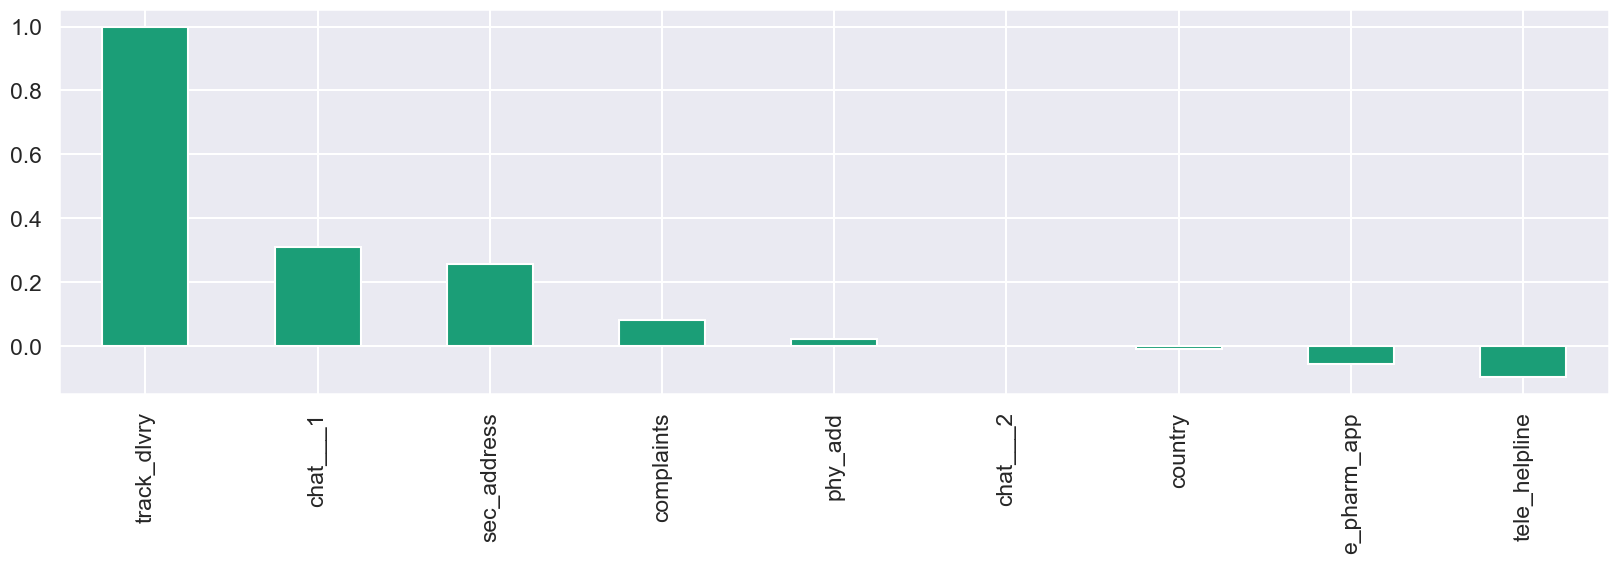

In [ ]:
## Analysis
# correlation plot
sns.set_theme(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(20,5))
track_data.corr()['track_dlvry'].sort_values(ascending = False).plot(kind='bar')

## having a chat option (live or bot) available for customer had the highest correlate 

In [22]:
# Prepare input/target variables
input = track_data.drop(['track_dlvry'], axis=1)
target = track_data['track_dlvry']


from sklearn.model_selection import train_test_split
X = input
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [28]:
# Perform a basic logistic regression model
from sklearn.linear_model import LogisticRegression


# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [30]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[5, 5],
       [7, 5]])

In [32]:
from sklearn.metrics import classification_report

target_names = ['without tracking', 'with tracking']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without tracking       0.42      0.50      0.45        10
   with tracking       0.50      0.42      0.45        12

        accuracy                           0.45        22
       macro avg       0.46      0.46      0.45        22
    weighted avg       0.46      0.45      0.45        22



In [ ]:
# generally a poor model for classification
# explore other models

In [34]:
# descision tree
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [35]:
clf.score(X_test, y_test)

0.45454545454545453

In [ ]:
# Find other parameters or features in the dataset